In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, 
    cohen_kappa_score, matthews_corrcoef, roc_auc_score, roc_curve, auc, precision_recall_curve, 
    hamming_loss, jaccard_score, log_loss
)

# Data Pre-Processing

In [2]:
# Loading dataset
df = pd.read_excel('/Users/sukanya/Documents/Alziemers Multi Modal/Dataset/FINAL.xlsx')

X = df.drop(columns=['ID', 'Dementia_Category'])
y = df['Dementia_Category']

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Dementia_Category
0,OAS1_0001_MR1,0,0,74,2.000000,3.000000,29.00000,0.000000,1344,0.743,1.306,20.55,2
1,OAS1_0002_MR1,0,0,55,4.000000,1.000000,29.00000,0.000000,1147,0.810,1.531,20.55,2
2,OAS1_0003_MR1,0,0,73,4.000000,3.000000,27.00000,0.500000,1454,0.708,1.207,20.55,0
3,OAS1_0004_MR1,1,0,28,3.178723,2.490741,27.06383,0.285106,1588,0.803,1.105,20.55,2
4,OAS1_0005_MR1,1,0,18,3.178723,2.490741,27.06383,0.285106,1737,0.848,1.010,20.55,2


In [11]:
# Helper function for evaluation
def evaluate_model(model_name, model, X_test, y_test, y_pred):
    print(f"\n{model_name} Results:")
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred, average='weighted')
    logloss = log_loss(y_test, model.predict_proba(X_test))

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    
    # Store metrics
    model_metrics[model_name] = {
        "Accuracy": accuracy,
        "Cohen Kappa": kappa,
        "Matthews Corrcoef": mcc,
        "Hamming Loss": hamming,
        "Weighted Jaccard Score": jaccard,
        "Log Loss": logloss
    }
    
    print(f"Accuracy: {accuracy}")
    print(f"Cohen Kappa Score: {kappa}")
    print(f"Matthews Correlation Coefficient: {mcc}")
    print(f"Hamming Loss: {hamming}")
    print(f"Weighted Jaccard Score: {jaccard}")
    print(f"Log Loss: {logloss}")
    
    # Bar plot for Precision, Recall, and F1-Score per class
    metrics_df = pd.DataFrame(report).transpose()
    class_labels = [str(label) for label in np.unique(y)]
    metrics_df = metrics_df.loc[class_labels, ['precision', 'recall', 'f1-score']]
    metrics_df.plot(kind='bar', figsize=(12, 8))
    plt.title(f"Class-wise Precision, Recall, and F1-Score for {model_name}")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    # ROC and Precision-Recall Curves for Multi-Class Models
    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    y_score = model.predict_proba(X_test)
    n_classes = y_test_binarized.shape[1]

    # ROC Curve
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC curve for class {i} (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {model_name}")
    plt.legend(loc="upper right")
    plt.show()

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.71      0.50      0.59        10
           2       1.00      0.96      0.98       102
           3       0.94      1.00      0.97        66

    accuracy                           0.95       201
   macro avg       0.87      0.84      0.85       201
weighted avg       0.95      0.95      0.94       201


Logistic Regression Results:
Accuracy: 0.945273631840796
Cohen Kappa Score: 0.9119719711749015
Matthews Correlation Coefficient: 0.9128852391669706
Hamming Loss: 0.05472636815920398
Weighted Jaccard Score: 0.9037076522151148
Log Loss: 0.17784748725823057


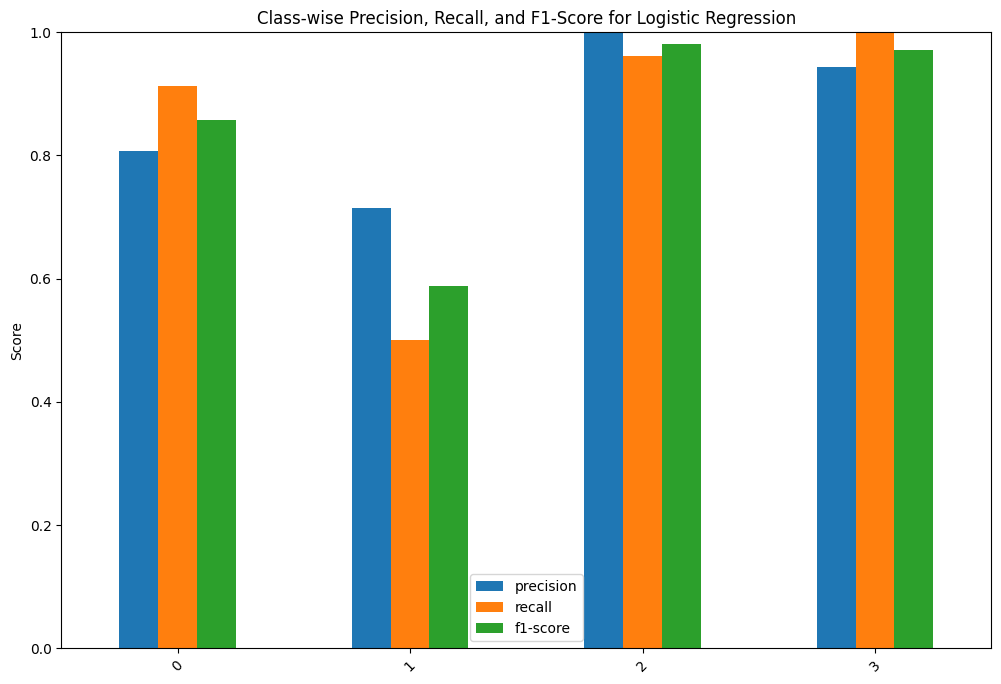

<Figure size 800x600 with 0 Axes>

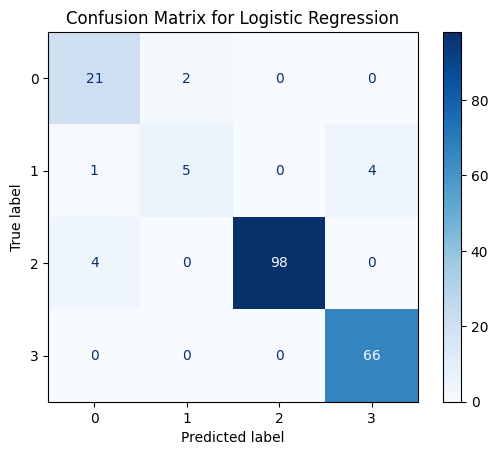

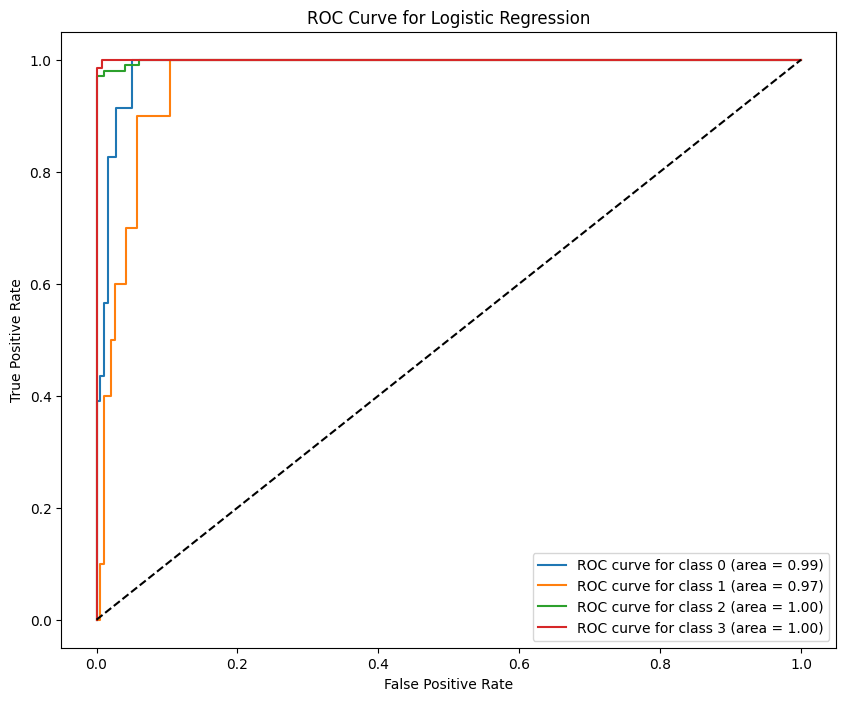

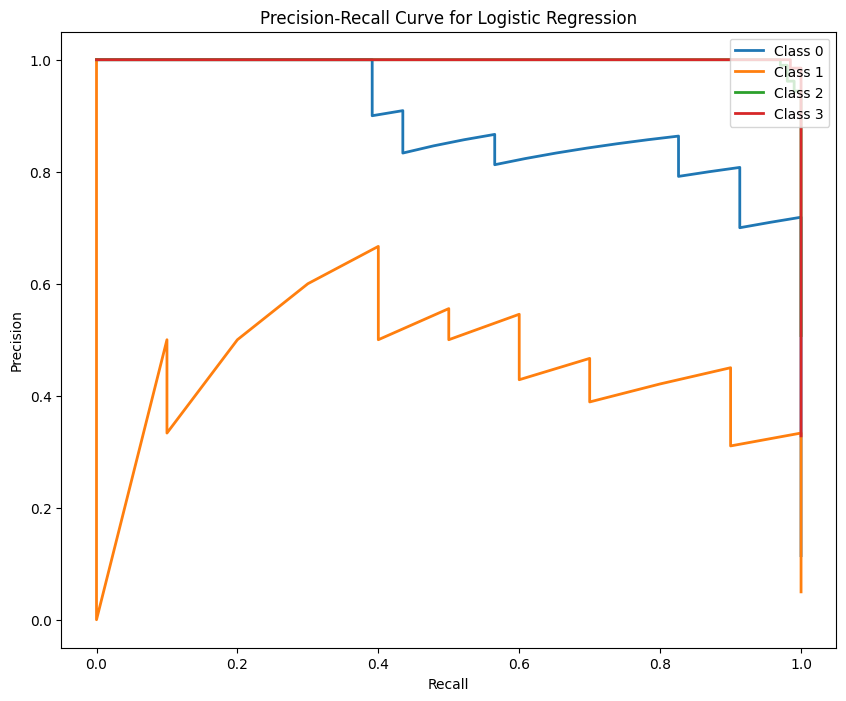

In [21]:
# Evaluation
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
evaluate_model("Logistic Regression", log_reg, X_test_scaled, y_test, y_pred_log_reg)

## Support Vector Machine

In [23]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

SVC(probability=True)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.20      0.10      0.13        10
           2       0.97      0.95      0.96       102
           3       0.94      1.00      0.97        66

    accuracy                           0.90       201
   macro avg       0.68      0.69      0.68       201
weighted avg       0.88      0.90      0.89       201


Support Vector Machine Results:
Accuracy: 0.8955223880597015
Cohen Kappa Score: 0.8307062928648778
Matthews Correlation Coefficient: 0.8316143735065338
Hamming Loss: 0.1044776119402985
Weighted Jaccard Score: 0.8374275807111627
Log Loss: 0.27823009570690976


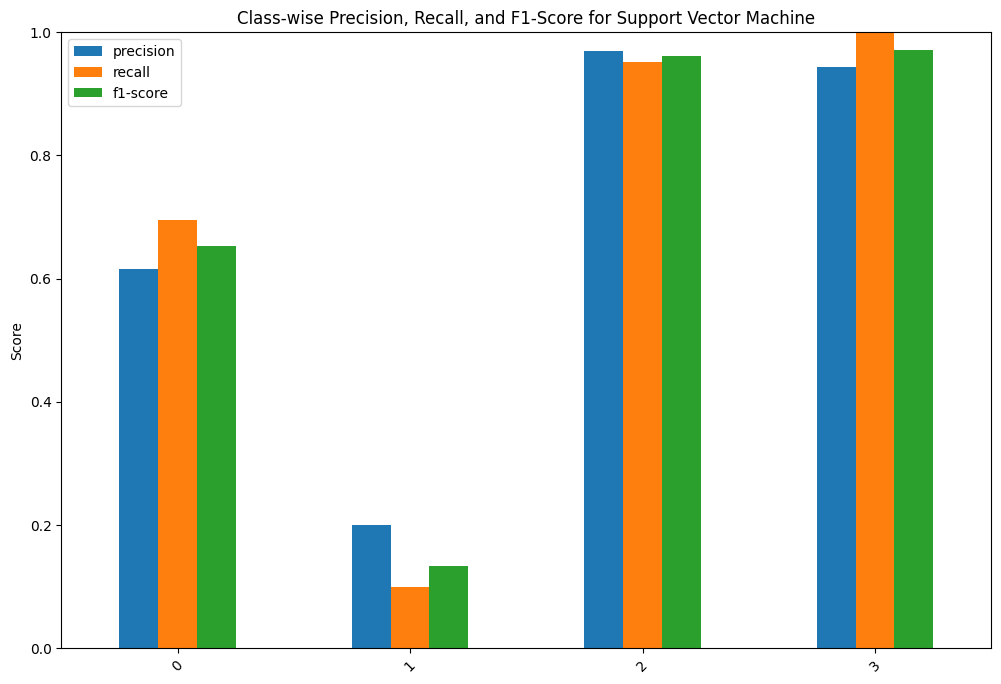

<Figure size 800x600 with 0 Axes>

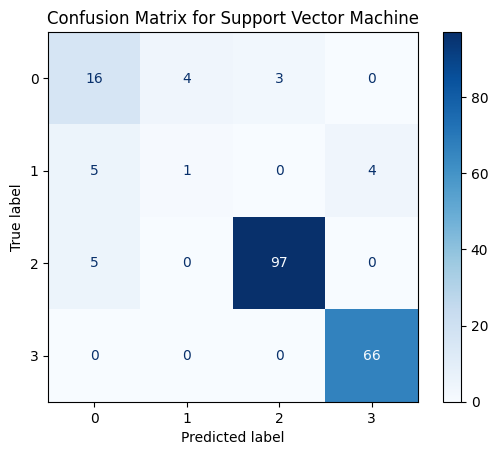

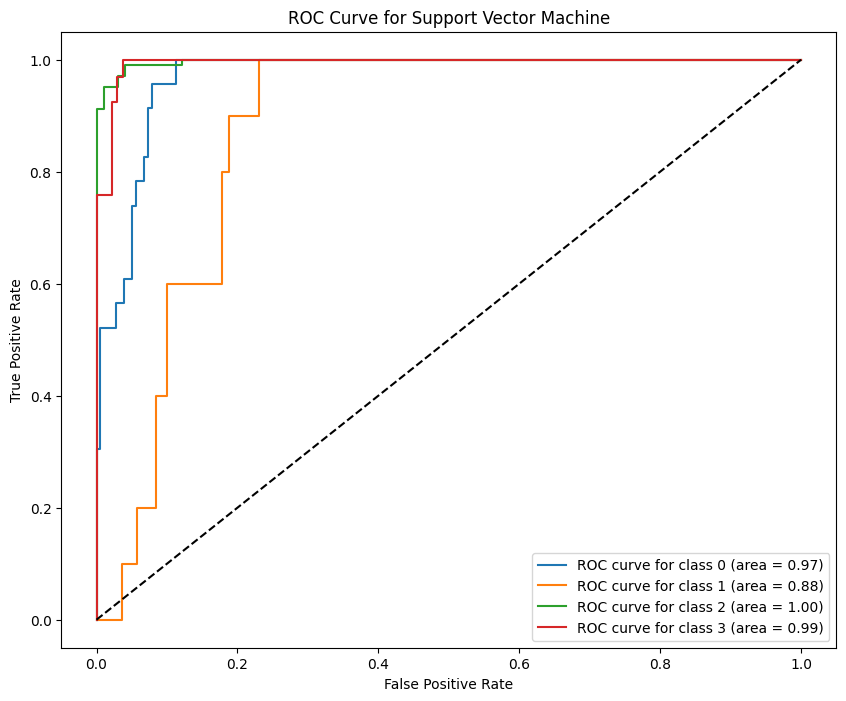

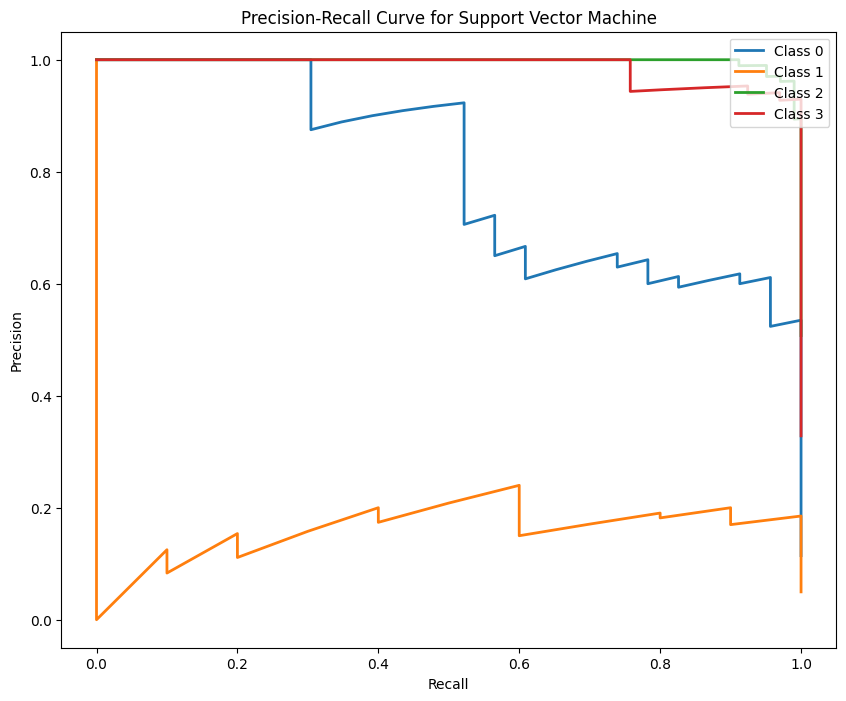

In [24]:
# Evaluation
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
evaluate_model("Support Vector Machine", svm, X_test_scaled, y_test, y_pred_svm)

## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00        66

    accuracy                           1.00       201
   macro avg       0.98      0.99      0.98       201
weighted avg       1.00      1.00      1.00       201


Random Forest Results:
Accuracy: 0.9950248756218906
Cohen Kappa Score: 0.991968031968032
Matthews Correlation Coefficient: 0.992007786694474
Hamming Loss: 0.004975124378109453
Weighted Jaccard Score: 0.9905020352781547
Log Loss: 0.13518002724183037


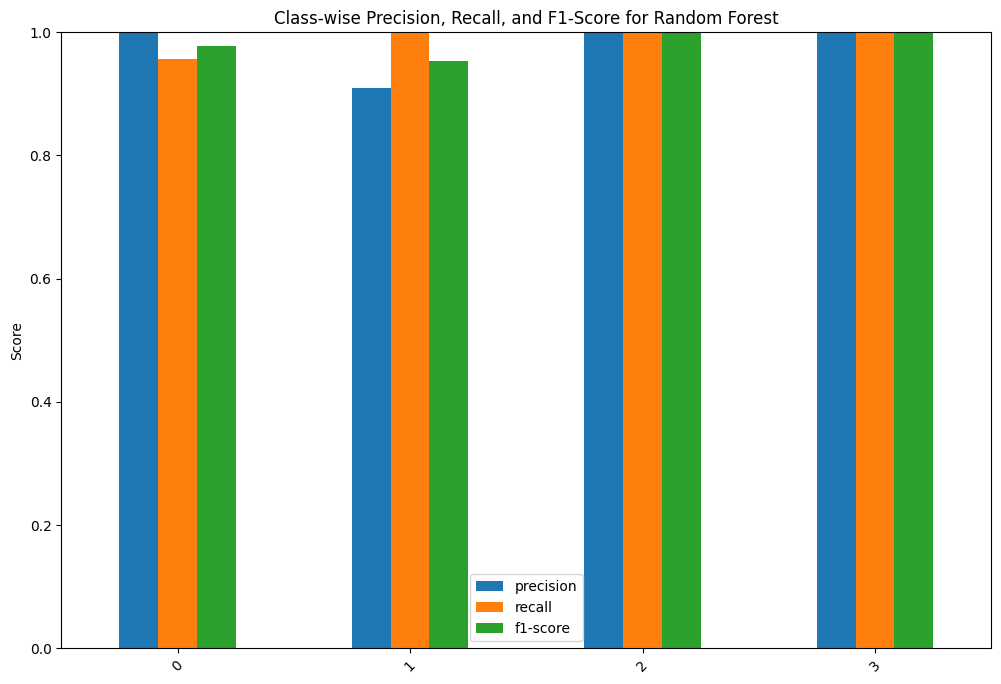

<Figure size 800x600 with 0 Axes>

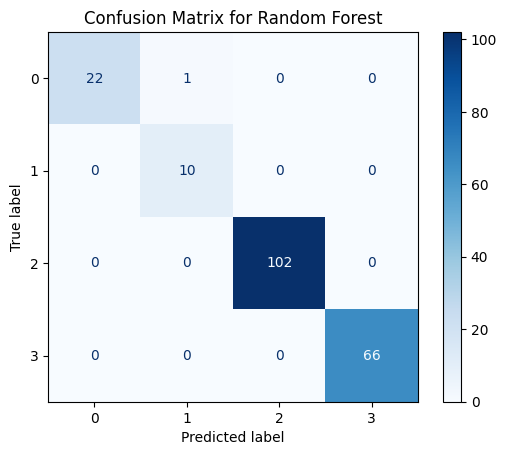

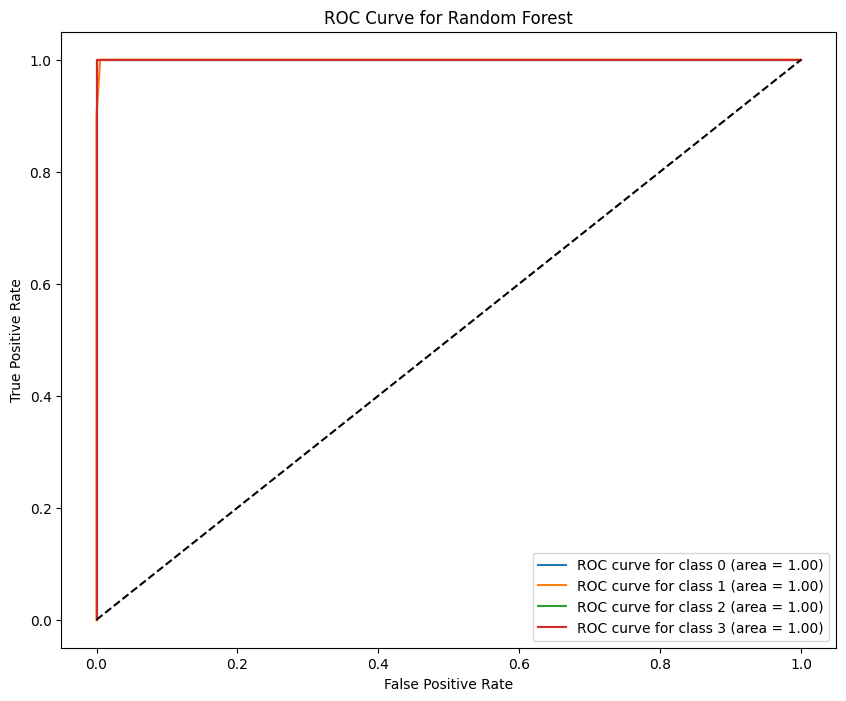

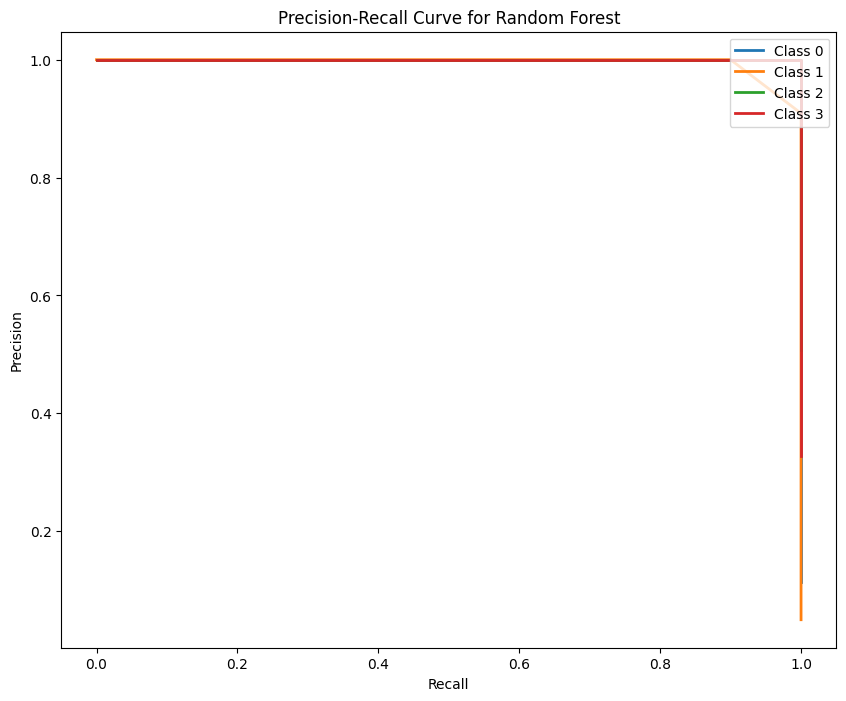

In [26]:
# Evaluation
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
evaluate_model("Random Forest", rf, X_test_scaled, y_test, y_pred_rf)

## K-Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.52      0.46        23
           1       0.15      0.20      0.17        10
           2       0.93      0.85      0.89       102
           3       0.89      0.88      0.89        66

    accuracy                           0.79       201
   macro avg       0.60      0.61      0.60       201
weighted avg       0.82      0.79      0.80       201


K-Nearest Neighbors Results:
Accuracy: 0.7910447761194029
Cohen Kappa Score: 0.6718494907875301
Matthews Correlation Coefficient: 0.6735108835750147
Hamming Loss: 0.208955223880597
Weighted Jaccard Score: 0.7049929410619988
Log Loss: 2.140168541198436


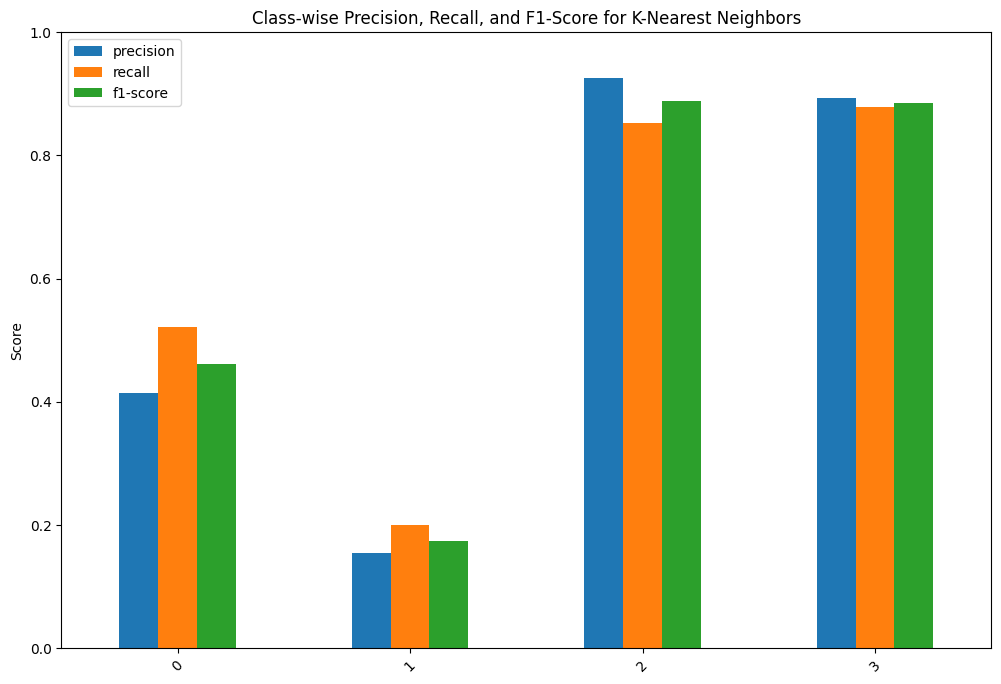

<Figure size 800x600 with 0 Axes>

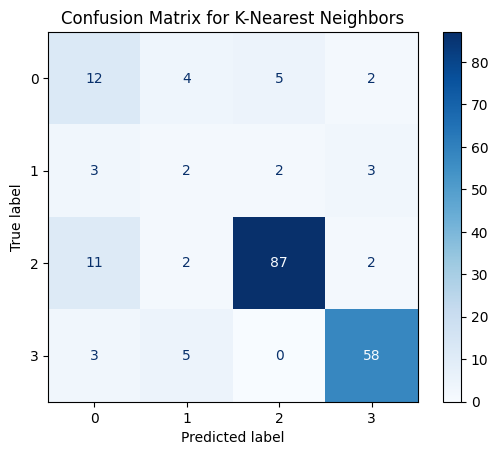

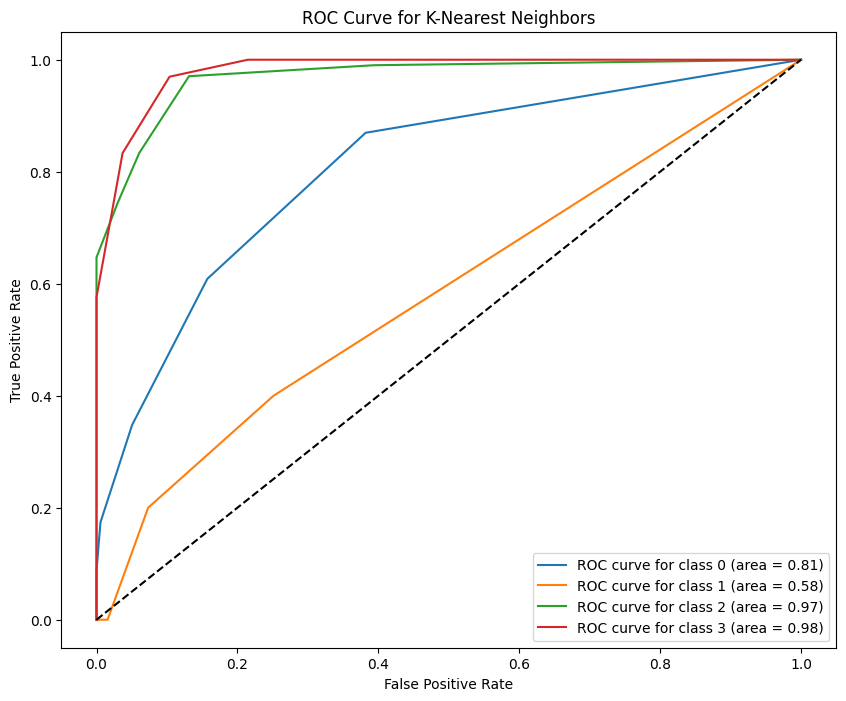

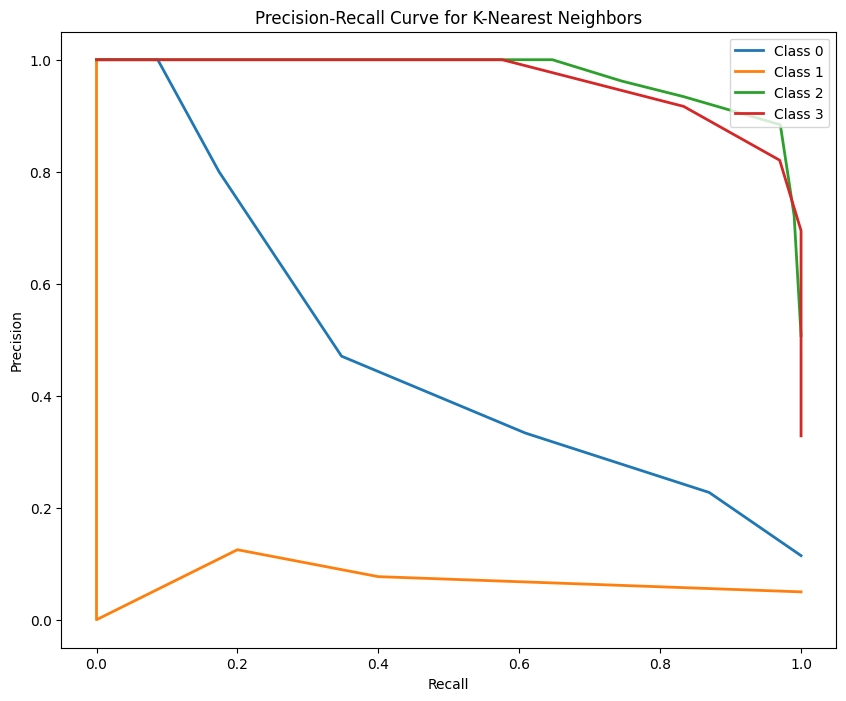

In [28]:
# Evaluation 
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
evaluate_model("K-Nearest Neighbors", knn, X_test_scaled, y_test, y_pred_knn)

# **Comparision of Algorithms:**

| Algorithm                   | Accuracy | Precision | Recall | F1-Score | Loss | Cohen Kappa Score | Matthews Corr. Coeff. | Hamming Loss | Weighted Jaccard |
|-----------------------------|----------|-----------------|--------------|----------------|----------|-------------------|-----------------------|--------------|------------------|
| **K-Nearest Neighbors**     | 0.791    | 0.82            | 0.79         | 0.80           | 2.140    | 0.672             | 0.674                 | 0.209        | 0.705            |
| **Support Vector Machine**  | 0.896    | 0.88            | 0.90         | 0.89           | 0.278    | 0.831             | 0.832                 | 0.104        | 0.837            |
| **Logistic Regression**     | 0.945    | 0.95            | 0.95         | 0.94           | 0.178    | 0.912             | 0.913                 | 0.055        | 0.904            |
| **Random Forest**           | 0.995    | 1.00            | 1.00         | 1.00           | 0.135    | 0.992             | 0.992                 | 0.005        | 0.991            |


## Performance-wise order of the models
### 1. Random Forest
### 2. Logistic Regression
### 3. SVM
### 4. KNN